In [1]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
from time import time
import seaborn as sns

#Model selection is the process of selecting one final machine learning model 
#from among a collection of candidate machine learning models for a training dataset.
from sklearn import model_selection
import scikitplot as skplt

#import classifiers from sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


#import XGBClassifier
from xgboost import XGBClassifier

# First time installation. Run once.
# !pip install lightgbm

# Import Light Gradient Boosting Classifier
from lightgbm import LGBMClassifier
import lightgbm as lgb

# First time installation. Run once.
#!pip install catboost

# Import Classification Boosting Classifier
from catboost import CatBoostClassifier

In [2]:
# Load dataset from Parksinsons UCI website:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"

In [3]:
# read the data set and headers into a pandas dataframe

dataset= pd.read_csv(url)

In [4]:
# print the dataset

display(dataset)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [5]:
# print the shape of of the dataset

print(dataset.shape)

(195, 24)


In [6]:
# print the info of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

## Attribute Information:
## Matrix column entries (attributes):
<li>name - ASCII subject name and recording number</li>
<br><li>MDVP:Fo(Hz) - Average vocal fundamental frequency</li>
<br><li>MDVP:Fhi(Hz) - Maximum vocal fundamental frequency</li>
<br><li>MDVP:Flo(Hz) - Minimum vocal fundamental frequency</li>
<br><li>MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency</li>
<br><li>MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude</li>
<br><li>NHR, HNR - Two measures of the ratio of noise to tonal components in the voice</li>
<br><li>status - The health status of the subject (one) - Parkinson's, (zero) - healthy</li>
<br><li>RPDE, D2 - Two nonlinear dynamical complexity measures</li>
<br><li>DFA - Signal fractal scaling exponent</li>
<br><li>spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation</li>

In [7]:
# To see the top 5 records of the dataset

dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
# Print the description of the dataset

dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
# print the patience status - 0 = Healthy, 1 = Parksinson
print(dataset.groupby('status').size())

status
0     48
1    147
dtype: int64


# Feature Engineering

In [10]:
# create a new DataFrame
data = pd.DataFrame()

# copy the dataset to another DataFrame
data = dataset.copy()

# remove name column from data
del data['name']

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [12]:
data.keys()

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

## Data Standardization & PCA

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [15]:
x_pca = pca.transform(scaled_data)
print(scaled_data.shape)
print(x_pca.shape)

(195, 23)
(195, 2)


Text(0, 0.5, 'Second Principal Component')

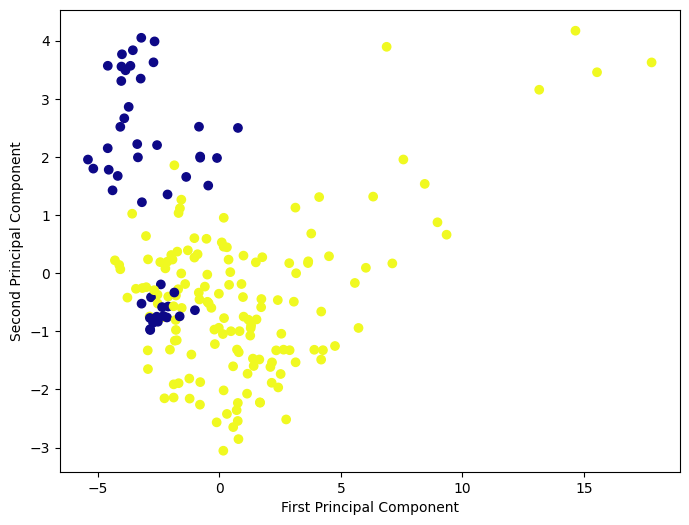

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=data['status'], cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [16]:
pca.components_

array([[-0.05646535,  0.00458721, -0.06656438,  0.25140846,  0.23961618,
         0.2466571 ,  0.2535059 ,  0.2466523 ,  0.25771967,  0.25925975,
         0.2510324 ,  0.25012523,  0.25148935,  0.25103372,  0.23030443,
        -0.24015591,  0.12340176,  0.14677813,  0.04267352,  0.22450945,
         0.1521295 ,  0.15472499,  0.23134402],
       [ 0.50958855,  0.31878924,  0.37925885,  0.10265631, -0.04321072,
         0.1338584 ,  0.08911972,  0.13386794,  0.05917711,  0.08279981,
         0.0667289 ,  0.0561515 ,  0.0522075 ,  0.06673159,  0.18447646,
        -0.03931222, -0.31585359, -0.22498797, -0.28219825, -0.2308742 ,
        -0.21298655,  0.09170875, -0.20212457]])

In [17]:
feature_names =(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'])

<AxesSubplot: >

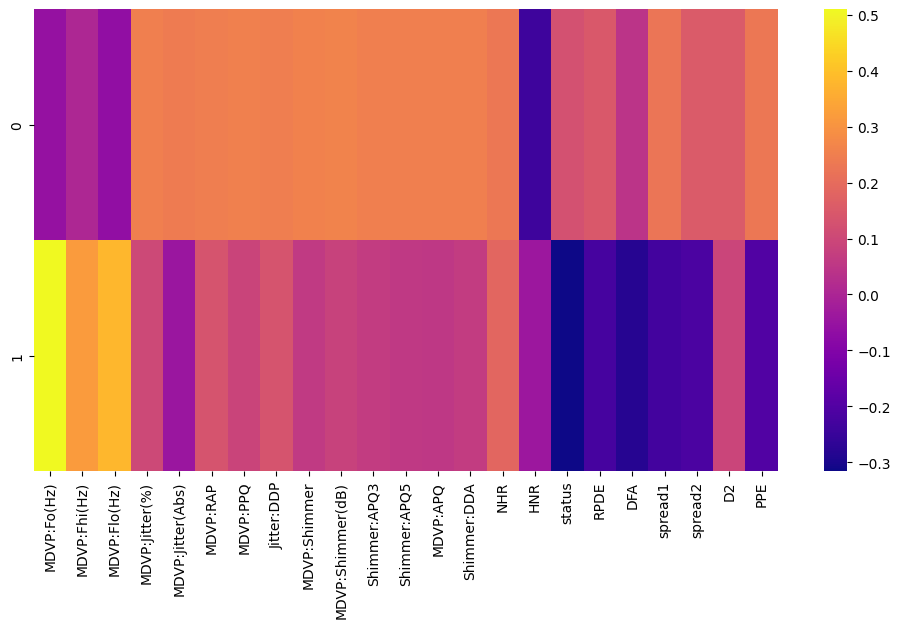

In [18]:
df_comp = pd.DataFrame(pca.components_, columns=feature_names)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')

# Data Visualization

In [19]:
# count the status of the patients

status_count = data['status'].value_counts()

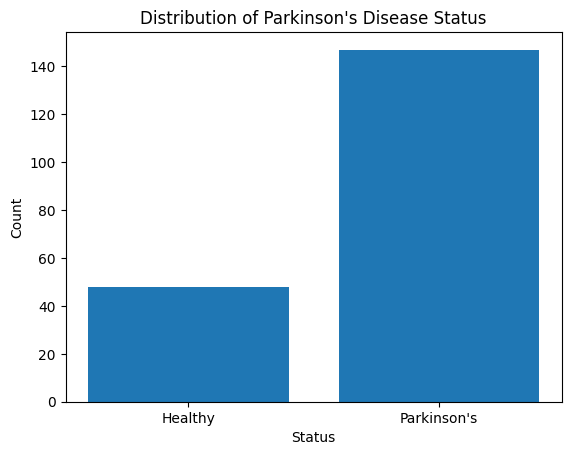

In [13]:
# plot the bar chart using matplotlib

# Create a list of labels for the x-axis
x_labels = ['Healthy', 'Parkinson\'s']

# Create a list of values for the y-axis
y_values = [status_count[0], status_count[1]]

plt.bar(x_labels, y_values)
plt.title('Distribution of Parkinson\'s Disease Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

(23.5, -0.5)

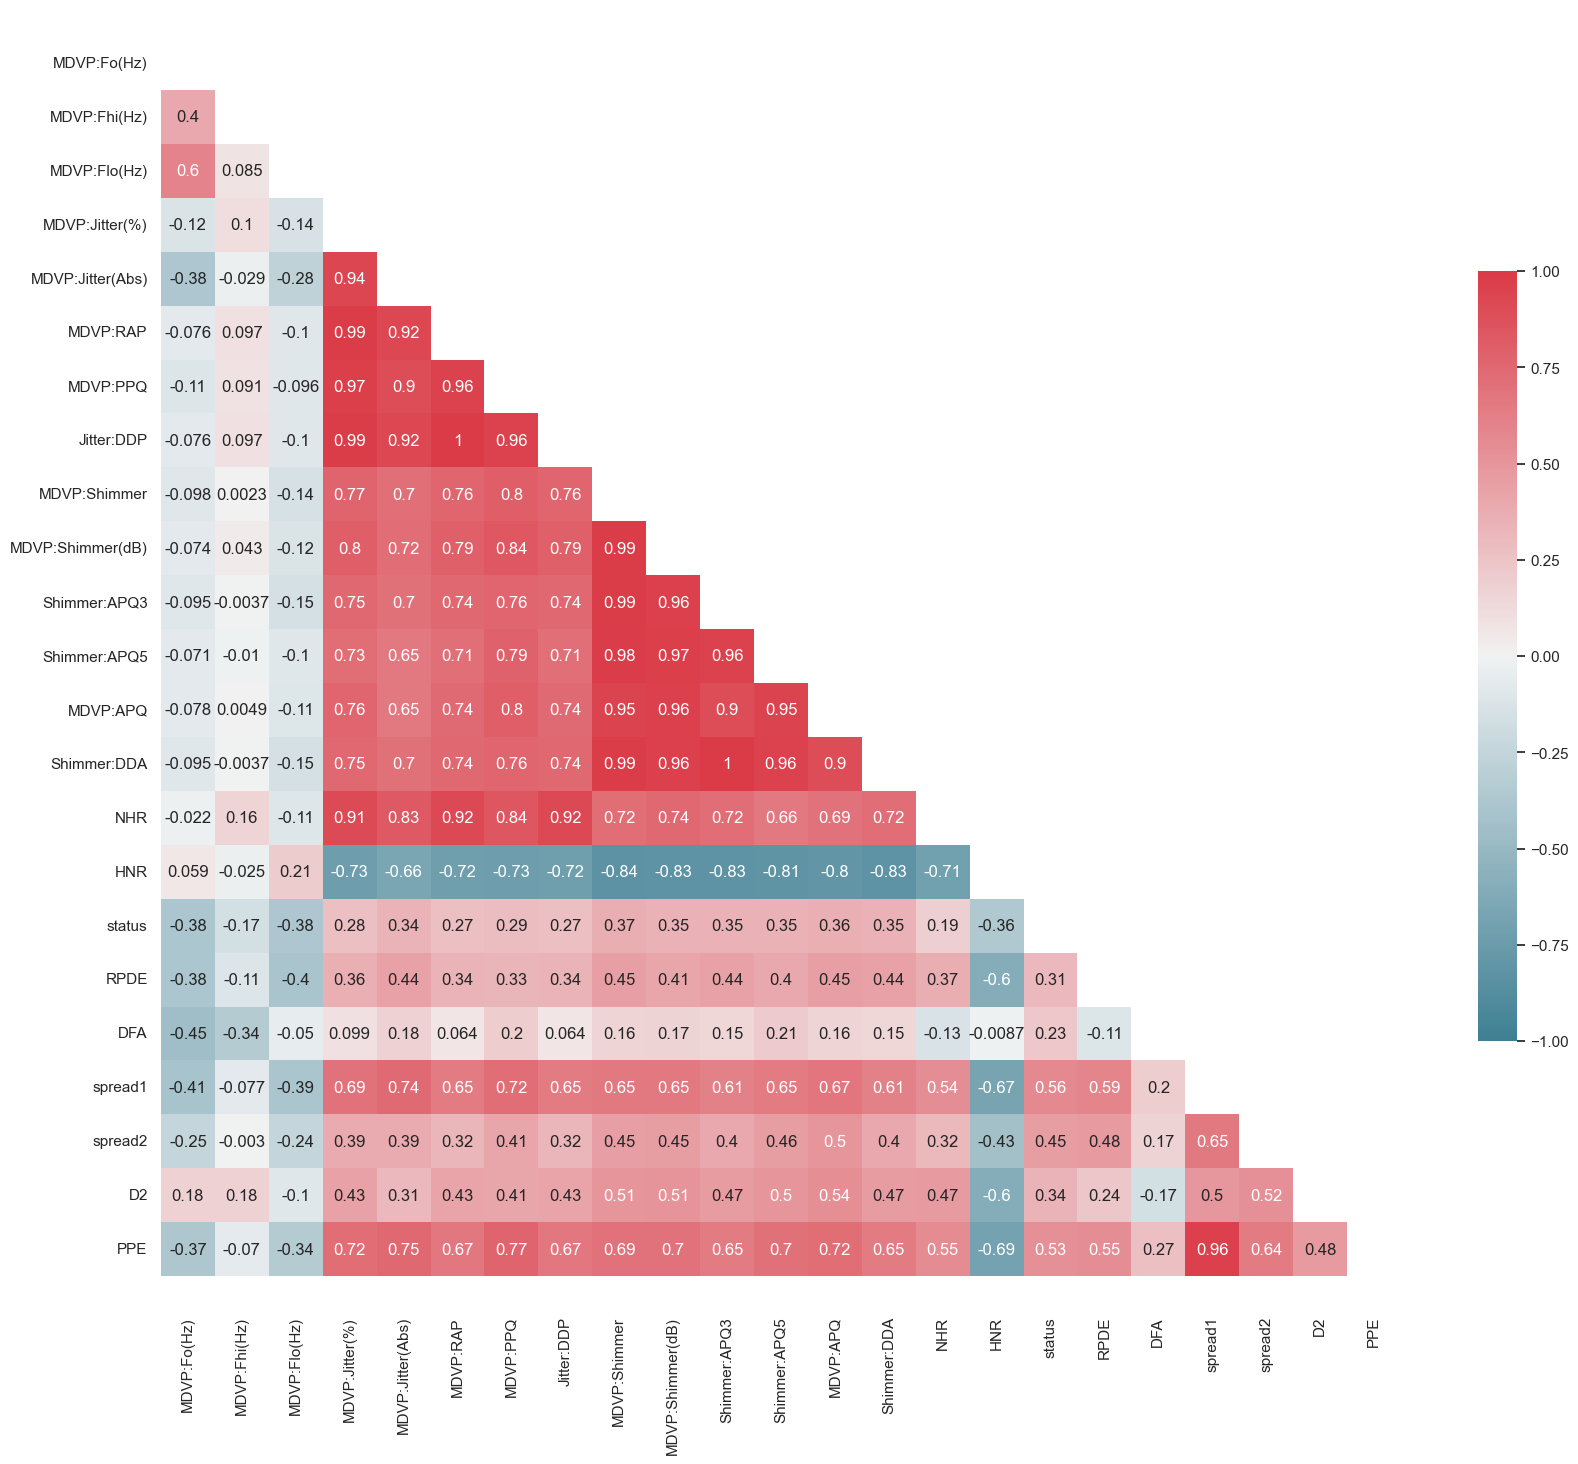

In [21]:
# Corr Matrix Heatmap Visualization

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(data.corr(numeric_only=True), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(20,20))

# Create a custom color palette
cmap = \
sns.diverging_palette(220, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(data.corr(numeric_only=True), mask=mask, annot=True, 
            square=True, cmap=cmap , vmin=-1, vmax=1,ax=ax, cbar_kws={"shrink": .5});

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

There are several pairs of highly correlated features:

MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, and MDVP:PPQ are all highly correlated with each other, with correlations greater than 0.97.

MDVP:Shimmer and MDVP:Shimmer(dB) are also highly correlated with each other, with a correlation greater than 0.97.

MDVP:Jitter(%) and Jitter:DDP are highly correlated, with a correlation of 0.99.

MDVP:Shimmer and Shimmer:DDA are highly correlated, with a correlation of 0.99.

In [91]:
# Drop 'MDVP:Jitter(%)', 'MDVP:PPQ', 'MDVP:Shimmer', 'Shimmer:DDA','Jitter:DDP','MDVP:Shimmer(dB)', 'Shimmer:APQ5', 'PPE'

data_clean = data.copy()
data_clean = data.loc[:, ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)',
       'MDVP:RAP', 'Shimmer:APQ3', 'MDVP:APQ', 'NHR', 'HNR', 'status', 'RPDE',
       'DFA', 'spread1', 'spread2', 'D2']]

data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(Abs)  195 non-null    float64
 4   MDVP:RAP          195 non-null    float64
 5   Shimmer:APQ3      195 non-null    float64
 6   MDVP:APQ          195 non-null    float64
 7   NHR               195 non-null    float64
 8   HNR               195 non-null    float64
 9   status            195 non-null    int64  
 10  RPDE              195 non-null    float64
 11  DFA               195 non-null    float64
 12  spread1           195 non-null    float64
 13  spread2           195 non-null    float64
 14  D2                195 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 23.0 KB


(15.5, -0.5)

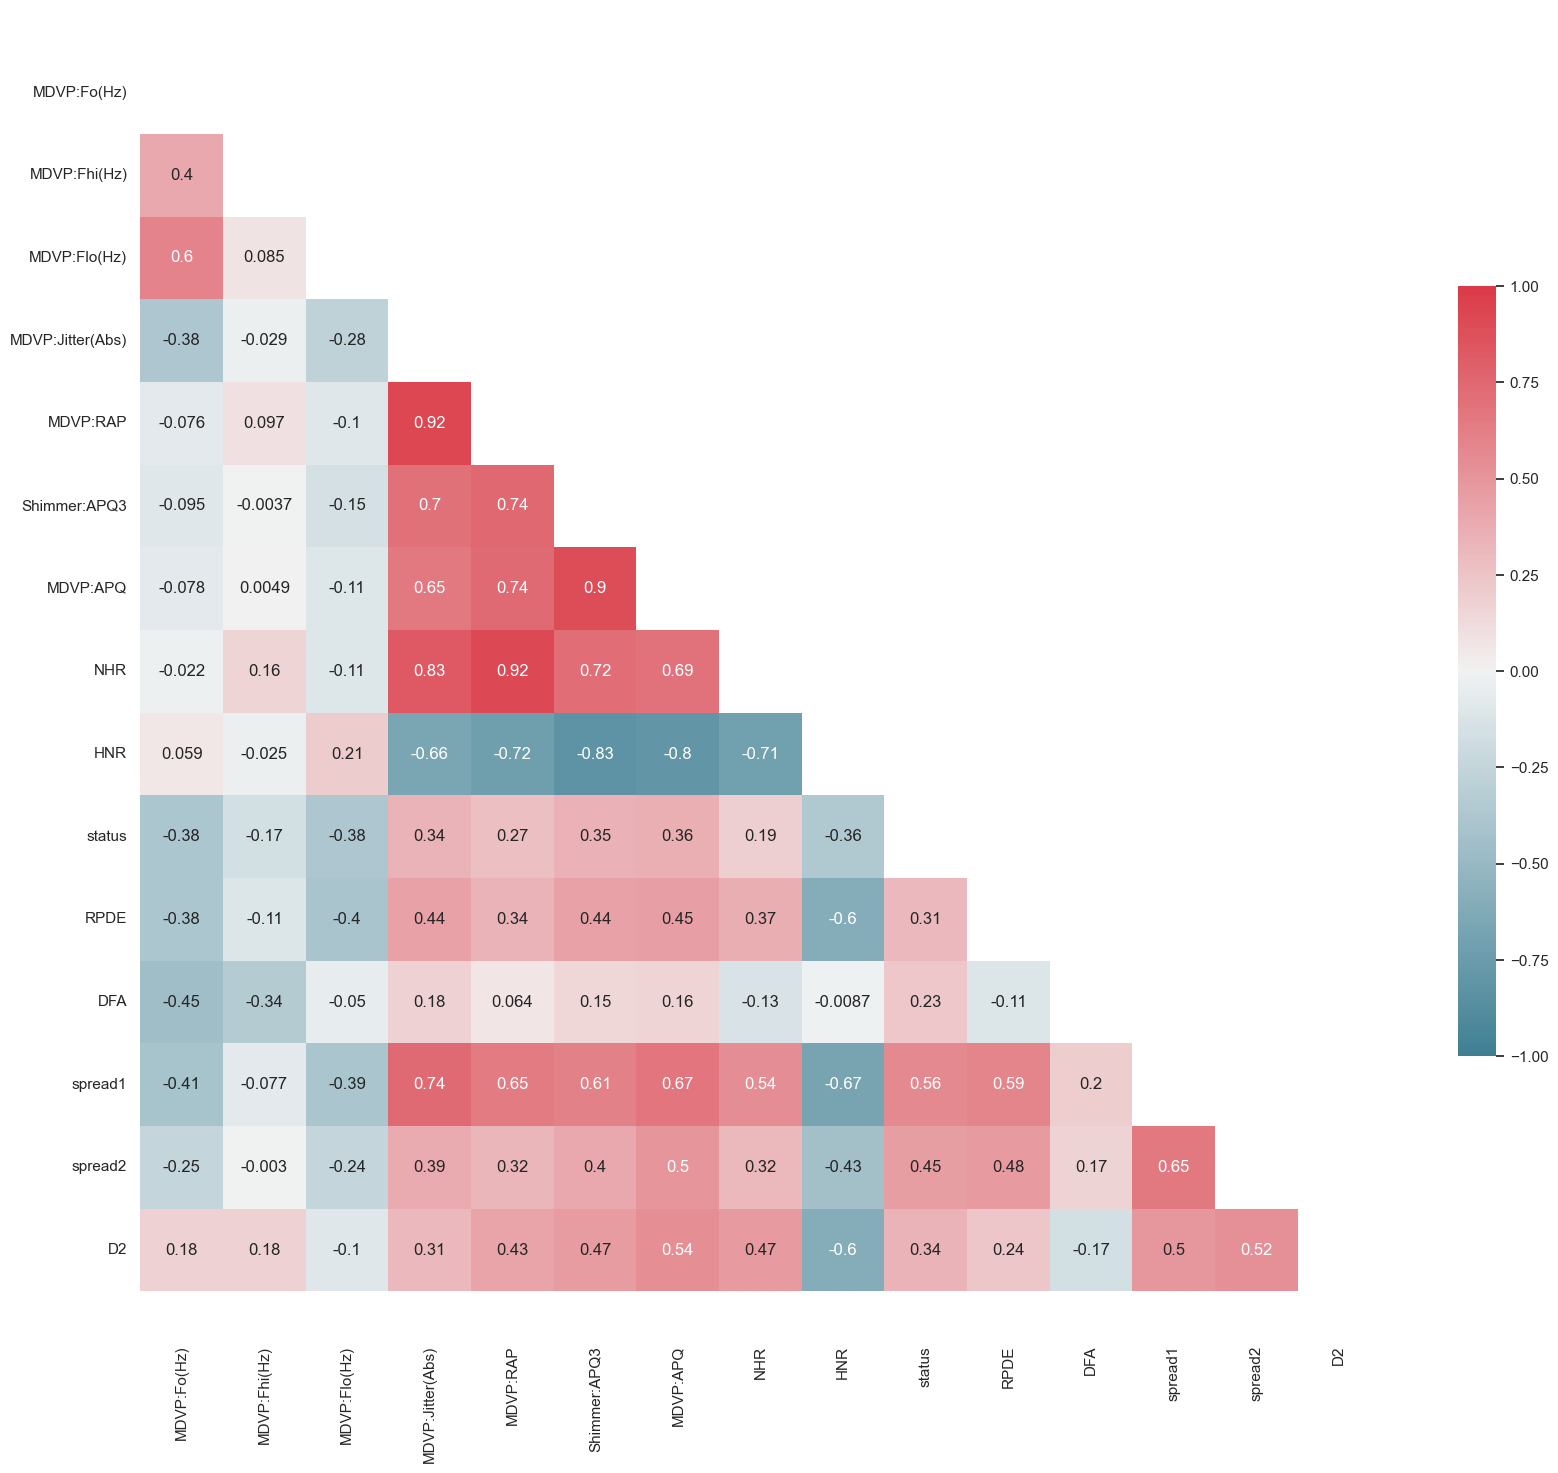

In [86]:
# Corr Matrix Heatmap Visualization

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(data_clean.corr(numeric_only=True), dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(20,20))

# Create a custom color palette
cmap = \
sns.diverging_palette(220, 10,
                      as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
sns.heatmap(data_clean.corr(numeric_only=True), mask=mask, annot=True, 
            square=True, cmap=cmap , vmin=-1, vmax=1,ax=ax, cbar_kws={"shrink": .5});

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [87]:
# to separate out 2 records from dataset to use for deployment later

# create empty lists to hold the sampled rows
status_0 = []
status_1 = []

# randomly select 1 row with status=0 and 1 row with status=1
status_0.append(data_clean[data_clean['status'] == 0].sample(n=1))
status_1.append(data_clean[data_clean['status'] == 1].sample(n=1))

# remove the selected rows from the dataset
data_clean = data.drop(status_0[0].index)
data_clean = data.drop(status_1[0].index)

# convert the sampled rows to a separate list for deployment
deployment_data = pd.concat([status_0[0], status_1[0]], axis=0)
print(deployment_data)
deployment_data.to_csv("deploy.csv")

    MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(Abs)  MDVP:RAP  \
53      129.336       139.867       118.604           0.00004   0.00165   
17      168.778       232.181        75.603           0.00004   0.00284   

    Shimmer:APQ3  MDVP:APQ      NHR     HNR  status      RPDE       DFA  \
53       0.01396   0.01947  0.00484  25.429       0  0.420383  0.785714   
17       0.01441   0.03430  0.02919  20.376       1  0.631099  0.605417   

     spread1   spread2        D2  
53 -6.836811  0.269866  2.223719  
17 -2.931070  0.434326  3.007463  


In [79]:
deployment_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 165 to 157
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       2 non-null      float64
 1   MDVP:Fhi(Hz)      2 non-null      float64
 2   MDVP:Flo(Hz)      2 non-null      float64
 3   MDVP:Jitter(Abs)  2 non-null      float64
 4   MDVP:RAP          2 non-null      float64
 5   Shimmer:APQ3      2 non-null      float64
 6   MDVP:APQ          2 non-null      float64
 7   NHR               2 non-null      float64
 8   HNR               2 non-null      float64
 9   status            2 non-null      int64  
 10  RPDE              2 non-null      float64
 11  DFA               2 non-null      float64
 12  spread1           2 non-null      float64
 13  spread2           2 non-null      float64
 14  D2                2 non-null      float64
dtypes: float64(14), int64(1)
memory usage: 256.0 bytes


In [88]:
data_clean.keys()

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

# Shuffle and Split the dataset

In [92]:
# Assign the X and Y values

X = data_clean.loc[:, data_clean.columns !='status'].values

y = data_clean.loc[:, 'status'].values

In [93]:
# print the count of X and y

print(X.shape)
print(y.shape)

(195, 14)
(195,)


In [94]:
# Split the data set into a training set (70%) and a test set (30%)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=13)

# Data Standardization

In [95]:
scaler = StandardScaler()

In [96]:
scaler.fit(X_train)

StandardScaler()

In [97]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [98]:
print(X_train)

[[-0.01130175 -0.36088649  0.42701551 ... -1.2848928  -0.28113419
  -1.07264978]
 [ 0.63252845 -0.08225384  1.15246813 ... -0.37862613 -0.45983229
   0.43736358]
 [ 2.09203249  0.5698212  -0.33512628 ... -1.11907708 -0.76949601
  -0.40192577]
 ...
 [-0.95697673 -0.71714896 -0.20970502 ...  0.25517681 -0.38929357
  -0.42805729]
 [-0.820946   -0.70680347 -0.16964965 ... -0.38820742 -1.57913666
  -1.04387224]
 [-1.19604559 -0.91679374 -0.4927565  ...  0.52136428 -1.09484784
   0.13593746]]


In [99]:
# Load deployment data
deployment_data = pd.read_csv("deploy.csv")

# select the desired columns
df = deployment_data.loc[:, ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)',
       'MDVP:RAP', 'Shimmer:APQ3', 'MDVP:APQ', 'NHR', 'HNR', 'status', 'RPDE',
       'DFA', 'spread1', 'spread2', 'D2']]

# Load scaler with feature names
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(df)

# Scale deployment data using the same scaler as used on training data
df_scaled = scaler.transform(df)

# Convert scaled deployment data to pandas DataFrame with feature names
deployment_data_df = pd.DataFrame(df_scaled, columns=df.columns)

# Save deployment data to CSV file
deployment_data_df.to_csv("deployment_data_scaled.csv", index=False)
print(deployment_data_df.head())


   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(Abs)  MDVP:RAP  \
0         -1.0          -1.0           1.0               0.0      -1.0   
1          1.0           1.0          -1.0               0.0       1.0   

   Shimmer:APQ3  MDVP:APQ  NHR  HNR  status  RPDE  DFA  spread1  spread2   D2  
0          -1.0      -1.0 -1.0  1.0    -1.0  -1.0  1.0     -1.0     -1.0 -1.0  
1           1.0       1.0  1.0 -1.0     1.0   1.0 -1.0      1.0      1.0  1.0  


# Train and Test using different algorithms and evaluate which gives the best score

In [100]:
# Evaluate Algorithms and set their hyperparameters

LR = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=200)
LDA = LinearDiscriminantAnalysis()
KNN = KNeighborsClassifier()
CART = DecisionTreeClassifier()
NB = GaussianNB()
SVM = SVC(gamma='auto')
XGB = XGBClassifier()
HGBC = HistGradientBoostingClassifier()
LGBMC = LGBMClassifier()
CBC = CatBoostClassifier(verbose=False)
RFC = RandomForestClassifier()

In [101]:
# Train the model using split training data (X_train, y_train)
LR.fit(X_train,y_train)
LDA.fit(X_train,y_train)
KNN.fit(X_train,y_train)
CART.fit(X_train,y_train)
NB.fit(X_train,y_train)
SVM.fit(X_train,y_train)
XGB.fit(X_train,y_train)
HGBC.fit(X_train,y_train)
LGBMC.fit(X_train,y_train)
CBC.fit(X_train,y_train)
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [102]:
# Evaluate the model using split test data (X_test, y_test)
accuracy_score_LR = accuracy_score(y_test,LR.predict(X_test))
accuracy_score_LDA = accuracy_score(y_test,LDA.predict(X_test))
accuracy_score_KNN = accuracy_score(y_test,KNN.predict(X_test))
accuracy_score_CART = accuracy_score(y_test,CART.predict(X_test))
accuracy_score_NB = accuracy_score(y_test,NB.predict(X_test))
accuracy_score_SVM = accuracy_score(y_test,SVM.predict(X_test))
accuracy_score_XGB = accuracy_score(y_test,XGB.predict(X_test))
accuracy_score_HGBC = accuracy_score(y_test,HGBC.predict(X_test))
accuracy_score_LGBMC = accuracy_score(y_test,LGBMC.predict(X_test))
accuracy_score_CBC = accuracy_score(y_test,CBC.predict(X_test))
accuracy_score_RFC = accuracy_score(y_test,RFC.predict(X_test))

print('LR:',accuracy_score_LR)
print('LDA:',accuracy_score_LDA)
print('KNN:',accuracy_score_KNN)
print('CART:',accuracy_score_CART)
print('NB:',accuracy_score_NB)
print('SVM:',accuracy_score_SVM)
print('XGB:',accuracy_score_XGB)
print('HGBC:',accuracy_score_HGBC)
print('LGBMC:',accuracy_score_LGBMC)
print('CBC:',accuracy_score_CBC)
print('RFC:',accuracy_score_RFC)

LR: 0.7966101694915254
LDA: 0.8135593220338984
KNN: 0.864406779661017
CART: 0.8983050847457628
NB: 0.711864406779661
SVM: 0.9322033898305084
XGB: 0.9322033898305084
HGBC: 0.8983050847457628
LGBMC: 0.9322033898305084
CBC: 0.9491525423728814
RFC: 0.9322033898305084


In [103]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Convert X to a pandas DataFrame
X = pd.DataFrame(X, columns=data_clean.columns[:-1])

# Fit ordinary least squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

            features         VIF
0        MDVP:Fo(Hz)   69.564482
1       MDVP:Fhi(Hz)    7.622176
2       MDVP:Flo(Hz)   15.877735
3   MDVP:Jitter(Abs)   68.778200
4           MDVP:RAP   74.260784
5       Shimmer:APQ3   27.851637
6           MDVP:APQ   26.627422
7                NHR   15.044141
8                HNR  110.496442
9             status   35.142839
10              RPDE  224.215700
11               DFA  135.968169
12           spread1   20.775539
13           spread2   75.130244


# Feature Importance

In [104]:
feature_labels = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)',
       'MDVP:RAP', 'Shimmer:APQ3', 'MDVP:APQ', 'NHR', 'HNR', 'status', 'RPDE',
       'DFA', 'spread1', 'spread2', 'D2']

MDVP:Jitter(Abs) - 226.49%
HNR - 316.10%
MDVP:Flo(Hz) - 336.71%
NHR - 343.07%
status - 379.03%
MDVP:APQ - 432.38%
MDVP:RAP - 578.67%
MDVP:Fhi(Hz) - 813.53%
spread2 - 818.89%
RPDE - 874.96%
Shimmer:APQ3 - 943.80%
spread1 - 1071.39%
MDVP:Fo(Hz) - 1336.71%
DFA - 1528.28%


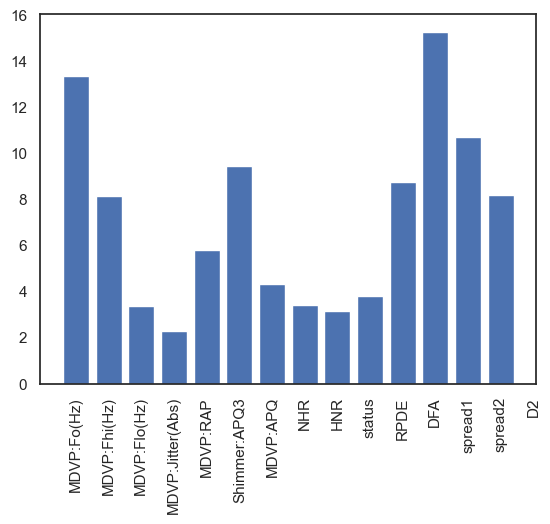

In [105]:
# get importance
importance = CBC.feature_importances_

# Get feature indices sorted by importance
feature_indexes_by_importance = importance.argsort()

# Print each feature label, from least important to most important
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index]* 100.0)))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(range(len(feature_labels)), feature_labels, rotation=90)
plt.show()

## Verdict:

The top 3 algorithm seems to be SVM, XBG, Catboost and Random Forest Classifier, let's evaluate these models using Confusion Matrix.

In [106]:
# Evaluating SVM model using Confusion matrix

print("Confusion matrix:")
print(confusion_matrix(y_test, SVM.predict(X_test)))
print("Classification report:")
print(classification_report(y_test, SVM.predict(X_test)))

Confusion matrix:
[[11  4]
 [ 0 44]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.92      1.00      0.96        44

    accuracy                           0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59



In [113]:
# Evaluating XGB model using Confusion matrix

print("Confusion matrix:")
print(confusion_matrix(y_test, XGB.predict(X_test)))
print("Classification report:")
print(classification_report(y_test, XGB.predict(X_test)))

Confusion matrix:
[[12  3]
 [ 1 43]]
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



In [117]:
# Evaluating Catboost model using Confusion matrix

print("Confusion matrix:")
print(confusion_matrix(y_test, CBC.predict(X_test)))
print("Classification report:")
print(classification_report(y_test, CBC.predict(X_test)))

Confusion matrix:
[[14  1]
 [ 2 42]]
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.98      0.95      0.97        44

    accuracy                           0.95        59
   macro avg       0.93      0.94      0.93        59
weighted avg       0.95      0.95      0.95        59



In [108]:
# Evaluating Random Forest Classifier model using Confusion matrix

print("Confusion matrix:")
print(confusion_matrix(y_test, RFC.predict(X_test)))
print("Classification report:")
print(classification_report(y_test, RFC.predict(X_test)))

Confusion matrix:
[[13  2]
 [ 2 42]]
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.95      0.95      0.95        44

    accuracy                           0.93        59
   macro avg       0.91      0.91      0.91        59
weighted avg       0.93      0.93      0.93        59



### As CatBoost have the highest scores, Catboost will be used for the rest of this project.

# Building a Predictive System

In [118]:
input_data = [129.336,139.867,118.604,0.0004,0.00165,0.01396,0.01947,0.00484,25.429,0,0.420383,0.785714,-6.836811,0.269866,2.223719]
# assign feature names to the input data
feature_names = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)',
       'MDVP:RAP', 'Shimmer:APQ3', 'MDVP:APQ', 'NHR', 'HNR', 'status', 'RPDE',
       'DFA', 'spread1', 'spread2', 'D2']
input_data_dict = dict(zip(feature_names, input_data))
input_data_df = pd.DataFrame(input_data_dict, index=[0])

#standardize the data
std_data = scaler.transform(input_data_df)

prediction = CBC.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The Person does not have Parkinson\'s Disease")
else:
    print("The Person has Parkinson\'s Disease")

[0]
The Person does not have Parkinson's Disease


In [119]:
input_data = [168.778,232.181,75.603,4e-05,0.00284,0.01441,0.0343,0.02919,20.376,1,0.631099,0.605417,-2.93107,0.434326,3.007463]

# assign feature names to the input data
feature_names = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(Abs)',
       'MDVP:RAP', 'Shimmer:APQ3', 'MDVP:APQ', 'NHR', 'HNR', 'status', 'RPDE',
       'DFA', 'spread1', 'spread2', 'D2']
input_data_dict = dict(zip(feature_names, input_data))
input_data_df = pd.DataFrame(input_data_dict, index=[0])

#standardize the data
std_data = scaler.transform(input_data_df)

prediction = CBC.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The Person does not have Parkinson\'s Disease")
else:
    print("The Person has Parkinson\'s Disease")

[1]
The Person has Parkinson's Disease


# Saving the Model

In [121]:
import pickle

In [124]:
filename = 'parkinsons_model1.pkl'
pickle.dump(CBC, open('parkinsons_model1.pkl','wb'))